## 練習のための準備

In [1]:
import numpy as np
import pandas as pd

# ファイル名（パス）を指定する
csv_path = "E:/DiveIntoCode/source/train.csv" # 絶対パス

# 指数表示の禁止を設定する
np.set_printoptions(suppress=True)

# csvファイル読み込み
df_train = pd.read_csv(csv_path)

## 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、説明変数GrLivAreaとYearBuilt、目的変数SalePriceをそれぞれ抜き出してください。

In [2]:
# Xに説明変数、yに目的変数となる列をそれぞれ抽出して代入
df_X = df_train[["GrLivArea","YearBuilt"]]
df_y = df_train["SalePrice"]
print(df_X, df_y)
# X,yをndarrayへ変換
X = df_X.values
y = df_y.values
print("==================================================")
print(X)
print(y)

      GrLivArea  YearBuilt
0          1710       2003
1          1262       1976
2          1786       2001
3          1717       1915
4          2198       2000
...         ...        ...
1455       1647       1999
1456       2073       1978
1457       2340       1941
1458       1078       1950
1459       1256       1965

[1460 rows x 2 columns] 0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64
[[1710 2003]
 [1262 1976]
 [1786 2001]
 ...
 [2340 1941]
 [1078 1950]
 [1256 1965]]
[208500 181500 223500 ... 266500 142125 147500]


## 【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation</a><br>
評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。<br>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html">sklearn.metrics.mean_squared_error — scikit-learn 0.21.3 documentation</a><br>
可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。<br>
scatterを用いて、実際のデータと予測結果を比較できるグラフを作りましょう。<br>

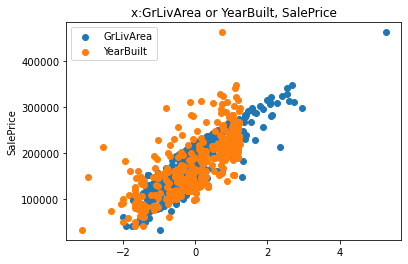

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# train_test_splitにX、yを代入（デフォルト(指定なし)で訓練75%、検証25%となる）
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # ※random_stateについて確認。42が一般的？

# インスタンス化
scaler = StandardScaler()

# 訓練用のデータのみを.fitで標準化
fit_X_tarin = scaler.fit(X_train)

# 訓練用、検証用双方のデータにtransformで標準化
tr_X_tarin = scaler.transform(X_train)
tr_X_test = scaler.transform(X_test)

# 線形回帰による学習
reg = LinearRegression().fit(tr_X_tarin, y_train)
# print(reg.score(X, y))

# 学習モデルによる推定
Y_pred = reg.predict(tr_X_test)

# 評価
evaluation = mean_squared_error(y_test, Y_pred)
# print(evaluation)

# 可視化
plt.scatter(tr_X_test[:,0], Y_pred) # GrLivArea
plt.scatter(tr_X_test[:,1], Y_pred) # YearBuilt
plt.title("x:GrLivArea or YearBuilt, SalePrice")
plt.ylabel("SalePrice")
plt.legend(["GrLivArea", "YearBuilt"])
plt.show()

## 【問題3】手法の比較
以下のすべての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。<br>
　・線形回帰<br>
　・SVM<br>
　・決定木<br>
　・ランダムフォレスト<br>
<br>
公式ドキュメントへのリンクは以下です。本来はパラメータチューニングを行いますが、まずはデフォルトの値で実行しましょう。<br>
　<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation</a><br>
　<a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html">sklearn.svm.SVR — scikit-learn 0.21.3 documentation</a><br>
　<a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html">sklearn.tree.DecisionTreeRegressor — scikit-learn 0.21.3 documentation</a><br>
　<a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html">sklearn.ensemble.RandomForestRegressor — scikit-learn 0.21.3 documentation</a><br>
<br>
SVM、決定木、ランダムフォレストは分類問題でも使用した手法ですが、回帰問題用のライブラリはそれぞれ専用のものに分かれています。<br>

2314465092.732013


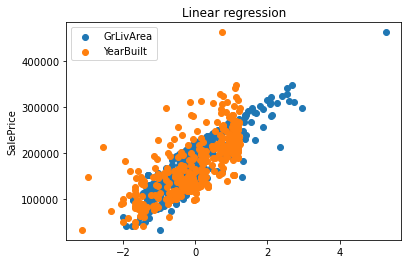

In [33]:
# 線形回帰による学習
reg = LinearRegression().fit(tr_X_tarin, y_train)

# 学習モデルによる推定
Y_pred = reg.predict(tr_X_test)

# 評価　平均二乗誤差
evaluation = mean_squared_error(y_test, Y_pred)
print(evaluation)

# 可視化
plt.scatter(tr_X_test[:,0], Y_pred) # GrLivArea
plt.scatter(tr_X_test[:,1], Y_pred) # YearBuilt
plt.title("Linear regression")
plt.ylabel("SalePrice")
plt.legend(["GrLivArea", "YearBuilt"])
plt.show()

2314465092.732013


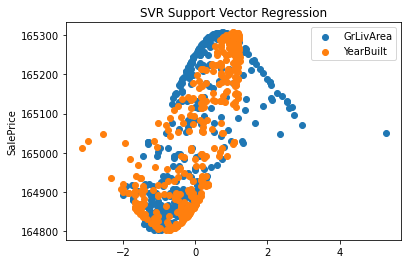

In [34]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# SVR
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(tr_X_tarin, y_train)

# 学習モデルによる推定
Y_pred = regr.predict(tr_X_test)
print(evaluation)

# 評価　平均二乗誤差
evaluation = mean_squared_error(y_test, Y_pred)

# 可視化
plt.scatter(tr_X_test[:,0], Y_pred) # GrLivArea
plt.scatter(tr_X_test[:,1], Y_pred) # YearBuilt
plt.title("SVR Support Vector Regression")
plt.ylabel("SalePrice")
plt.legend(["GrLivArea", "YearBuilt"])
plt.show()

7169220356.741393


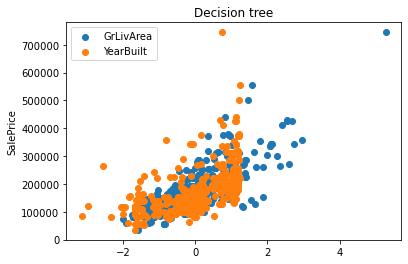

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# 決定木
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(tr_X_tarin, y_train)
cross_val_score(regressor, tr_X_tarin, y_train, cv=10)

# 学習モデルによる推定
Y_pred = regressor.predict(tr_X_test)
print(evaluation)

# 評価　平均二乗誤差
evaluation = mean_squared_error(y_test, Y_pred)

# 可視化
plt.scatter(tr_X_test[:,0], Y_pred) # GrLivArea
plt.scatter(tr_X_test[:,1], Y_pred) # YearBuilt
plt.title("Decision tree")
plt.ylabel("SalePrice")
plt.legend(["GrLivArea", "YearBuilt"])
plt.show()

2805721096.3882065


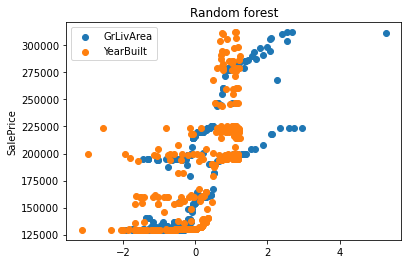

In [36]:
from sklearn.ensemble import RandomForestRegressor

# ランダムフォレスト
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(tr_X_tarin, y_train)

# 学習モデルによる推定
Y_pred = regr.predict(tr_X_test)

# 評価　平均二乗誤差
evaluation = mean_squared_error(y_test, Y_pred)
print(evaluation)

# 可視化
plt.scatter(tr_X_test[:,0], Y_pred) # GrLivArea
plt.scatter(tr_X_test[:,1], Y_pred) # YearBuilt
plt.title("Random forest")
plt.ylabel("SalePrice")
plt.legend(["GrLivArea", "YearBuilt"])
plt.show()

|                    | 平均二乗誤差 |
|-|-|
| 最近傍法 | 2314465092.732013 |
| SVR | 2314465092.732013 |
| 決定木             | 7169220356.741393 |
| ランダムフォレスト | 2805721096.388207 |

<< 考察 >><br>
平均二乗誤差であるため、数値が大きくなってはいるが、決定木以外は全体的に似たような数値を出していた。<br>
（他の３指標を正しいとするのであれば）決定木は特徴量を変えたり、パラメータを変更するなどする必要があると思われる。<br>
築年数で考えるとある段階から乖離が見られるため、どちらかと言えば、リビングの広さで価格予測を行った方が精度が高いと思われる。<br>